In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight','ggplot'])

# Common Definitions

In [20]:
acc_columns = ["linearacc_x", "linearacc_y", "linearacc_z"]
gyro_columns = ["gyro_x", "gyro_y", "gyro_z"]

# Find files

In [11]:
data_root_folder_path = "../data_from_phone/"
folder_name = "test_2022-04-05-00-00-00/"

In [13]:
data_folder_path = os.path.join(data_root_folder_path, folder_name)
files = os.listdir(data_folder_path)
files = [f for f in files if f.endswith(".csv")] # remove unnecessary files

In [14]:
gesture_files = [f for f in files if f.startswith("GESTURE_")]
noise_files = [f for f in files if f.startswith("NOISE_")]

# Read a file

In [42]:
file = gesture_files[0]
file_path = os.path.join(data_folder_path, file)

In [43]:
def read_file(file_path):
    df_data = pd.read_csv(file_path)
    df_data["timestamp"] = df_data["timestamp"] - df_data["timestamp"].iloc[0] # remove the offset
    df_data["timestamp"] /= 1000.0 # convert to second unit
    df_data.set_index("timestamp", inplace = True)
    return df_data

In [44]:
df_data = read_file(file_path)

# Plot the Data

In [45]:
df_data.head()

,linearacc_x,linearacc_y,linearacc_z,gyro_x,gyro_y,gyro_z,batch,interval
timestamp,,,,,,,,
0.000,-0.035844,-0.038829,-0.003546,-0.088955,-1.788461,0.898347,0.016667,15
0.016,0.008925,-0.024301,-0.068476,-0.265046,-0.649768,0.984203,0.016667,15
0.033,-0.015278,0.016887,-0.079941,-0.515885,0.155399,0.386273,0.016667,15
0.050,0.044703,0.081172,-0.039480,-0.415146,0.270720,0.452019,0.016667,15
0.066,-0.024604,0.060928,-0.004943,-0.556734,-0.913333,0.001537,0.016667,15


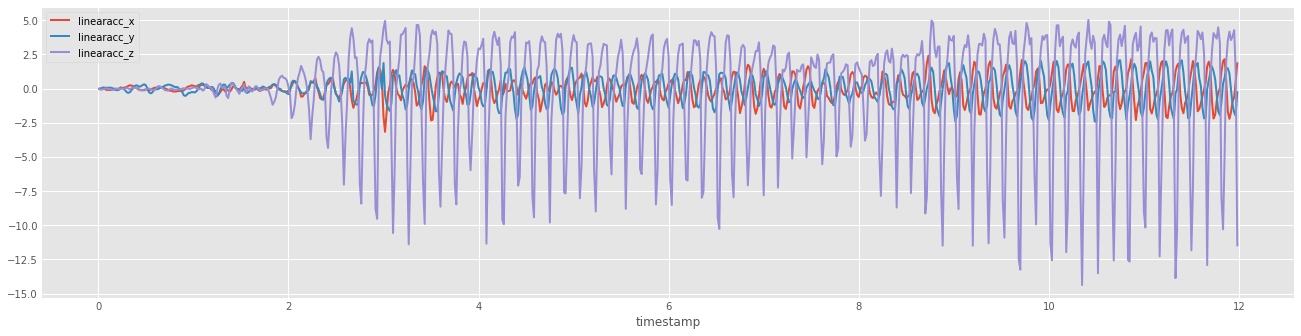

In [46]:
fig, ax = plt.subplots(figsize = (20,5))
df_data[acc_columns].plot(ax=ax, linewidth = 2)

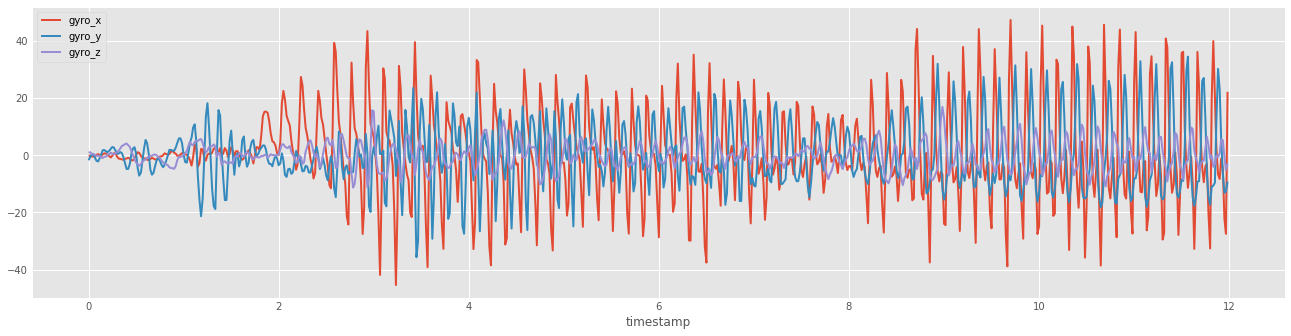

In [47]:
fig, ax = plt.subplots(figsize = (20,5))
df_data[gyro_columns].plot(ax=ax, linewidth = 2)

In [49]:
df_data_noise = read_file(os.path.join(data_folder_path, noise_files[0]))

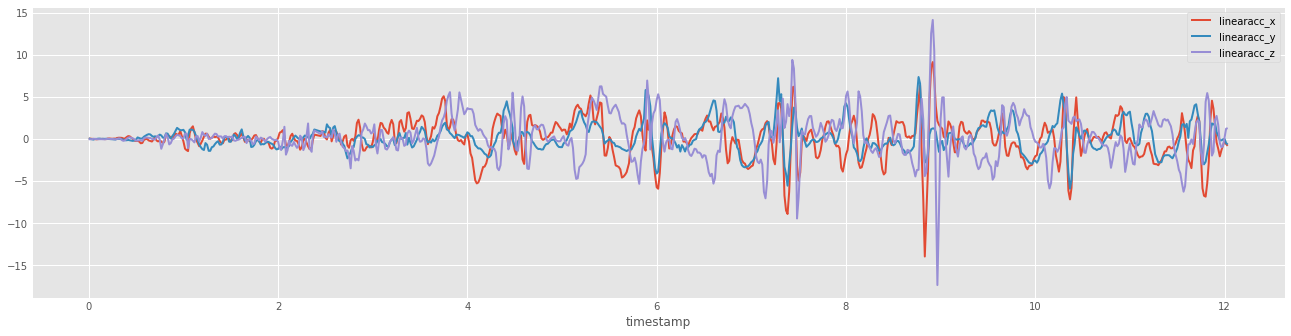

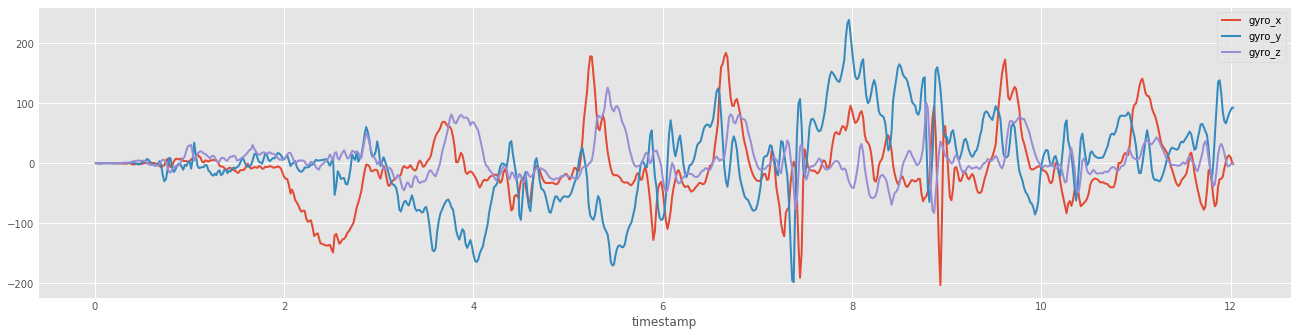

In [50]:
fig, ax = plt.subplots(figsize = (20,5))
df_data_noise[acc_columns].plot(ax=ax, linewidth = 2)
plt.show()
fig, ax = plt.subplots(figsize = (20,5))
df_data_noise[gyro_columns].plot(ax=ax, linewidth = 2)
plt.show()

# Basic Analysis

# Data Segmentation

# Machine Learning Model Training